# Import libraries

In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap


# Load datasets

In [2]:
train_data = pd.read_csv(r'C:\Users\admin\Downloads\fraudTrain.csv')
test_data = pd.read_csv(r'C:\Users\admin\Downloads\fraudTest.csv')

# EDA

# Basic information

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

# Summary statistics

In [5]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
test_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


# Check for missing value

In [7]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# Visualize the distribution of the target variable

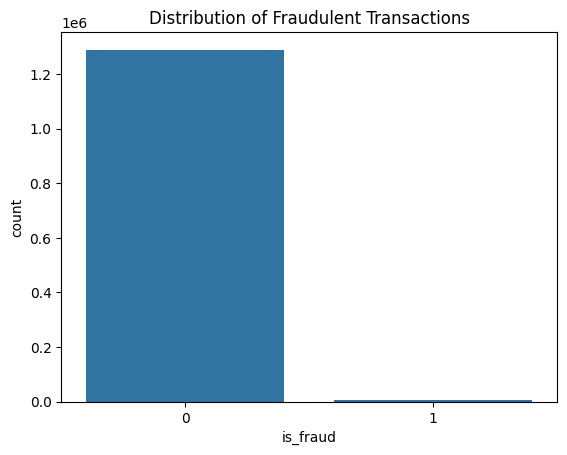

In [9]:
sns.countplot(x='is_fraud', data=train_data)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

# Visualize the distribution of transaction amounts

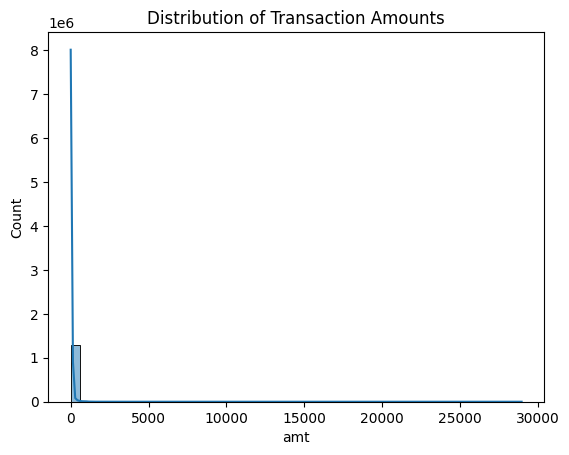

In [10]:
sns.histplot(train_data['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

# Drop unnecessary columns

In [11]:
train_data.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num', 'unix_time'], inplace=True)
test_data.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num', 'unix_time'], inplace=True)

# Encode categorical variables

In [12]:
def safe_label_encode(train_series, test_series):
    le = LabelEncoder()
    train_encoded = le.fit_transform(train_series)
    le.classes_ = np.append(le.classes_, 'unknown')
    test_encoded = le.transform(test_series.map(lambda x: x if x in le.classes_ else 'unknown'))
    return train_encoded, test_encoded, le

label_encoders = {}
for column in ['merchant', 'category', 'gender', 'job']:
    train_data[column], test_data[column], le = safe_label_encode(train_data[column], test_data[column])
    label_encoders[column] = le

# Separate features and target

In [13]:
X_train = train_data.drop(columns=['is_fraud'])
y_train = train_data['is_fraud']
X_test = test_data.drop(columns=['is_fraud'])
y_test = test_data['is_fraud']

# Scale numerical features

In [14]:
scaler = StandardScaler()
X_train[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']] = scaler.fit_transform(X_train[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']])
X_test[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']] = scaler.transform(X_test[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']])


# Logistic Regression

In [15]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Accuracy: 0.9955049224518147
Confusion Matrix:
 [[553221    353]
 [  2145      0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



# Decision Tree

In [17]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.9961437345133062
Confusion Matrix:
 [[552356   1218]
 [   925   1220]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.50      0.57      0.53      2145

    accuracy                           1.00    555719
   macro avg       0.75      0.78      0.77    555719
weighted avg       1.00      1.00      1.00    555719



# Using SHAP for explainability

In [21]:
subset_size = 1000
X_test_subset = X_test.sample(n=subset_size, random_state=42)

explainer_dt = shap.TreeExplainer(dt_model)
shap_values_dt = explainer_dt.shap_values(X_test_subset)

# Summary plot

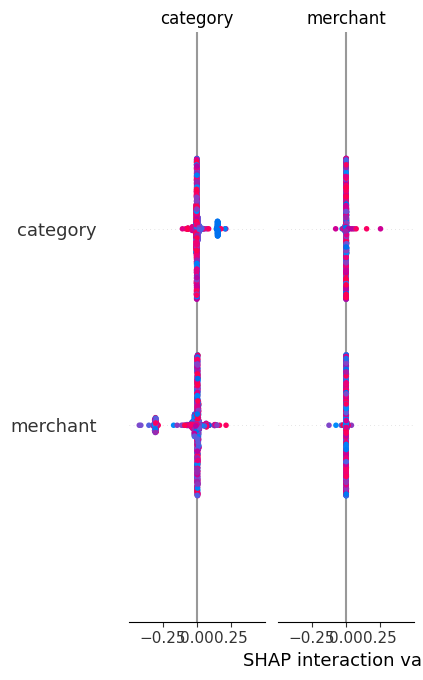

In [22]:
shap.summary_plot(shap_values_dt, X_test_subset)

# Save the best Logistic Regression model

In [23]:
joblib.dump(dt_model, 'best_decision_tree_model.pkl')

['best_decision_tree_model.pkl']